# [NTDS'18] milestone 3: spectral graph theory
[ntds'18]: https://github.com/mdeff/ntds_2018

[Michaël Defferrard](http://deff.ch), [EPFL LTS2](https://lts2.epfl.ch)

## Students

* Team: `4`
* Students: `Julien Berger, Jérémy Jayet, Hana Samet, Mathieu Shiva`
* Dataset: `IMDb Films and Crew`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* You cannot import any other library than we imported.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The goal of this milestone is to get familiar with the graph Laplacian and its spectral decomposition.

## 0 Load your network

In [1]:
%matplotlib inline

If you get a `No module named 'sklearn'` error when running the below cell, install [scikit-learn](https://scikit-learn.org) with `conda install scikit-learn` (after activating the `ntds_2018` environment).

In [2]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Let's denote your graph as $\mathcal{G} = (\mathcal{V}, \mathcal{E}, A)$, where $\mathcal{V}$ is the set of nodes, $\mathcal{E}$ is the set of edges, $A \in \mathbb{R}^{N \times N}$ is the (weighted) adjacency matrix, and $N = |\mathcal{V}|$ is the number of nodes.

Import the adjacency matrix $A$ that you constructed in the first milestone.
(You're allowed to update it between milestones if you want to.)

In [3]:
adjacency = np.load('./data/adjacency.npy')
    
#We calculate the number of nodes   
n_nodes=adjacency.shape[0]

#We make the matrix more sparse by removing the link between two people if they worked only on 1 movie together
adjacency[adjacency <2]=0

n_edges =  np.count_nonzero(adjacency)/2

## 1 Graph Laplacian

### Question 1

From the (weighted) adjacency matrix $A$, compute both the combinatorial (also called unnormalized) and the normalized graph Laplacian matrices.

Note: if your graph is weighted, use the weighted adjacency matrix. If not, use the binary adjacency matrix.

For efficient storage and computation, store these sparse matrices in a [compressed sparse row (CSR) format](https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_.28CSR.2C_CRS_or_Yale_format.29).

In [4]:
np.seterr(divide='ignore')
adjacency_csr= sparse.csr_matrix(adjacency)

degree_csr= sparse.spdiags(np.sum(adjacency, axis=1),0,n_nodes,n_nodes)

laplacian_combinatorial =degree_csr-adjacency_csr

laplacian_normalized = degree_csr.power(-1/2)*laplacian_combinatorial*degree_csr.power(-1/2)

Use one of them as the graph Laplacian $L$ for the rest of the milestone.
We however encourage you to run the code with both to get a sense of the difference!

In [5]:
laplacian =laplacian_normalized  # Either laplacian_combinatorial or laplacian_normalized.

### Question 2

Compute the eigendecomposition of the Laplacian $L = U^\top \Lambda U$, where the columns $u_k \in \mathbb{R}^N$ of $U = [u_1, \dots, u_N] \in \mathbb{R}^{N \times N}$ are the eigenvectors and the diagonal elements $\lambda_k = \Lambda_{kk}$ are the corresponding eigenvalues.

Make sure that the eigenvalues are ordered, i.e., $0 = \lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_N$.

In [7]:
eigenvalues, eigenvectors= np.linalg.eigh(laplacian.toarray())
# Note that eigh already sorts the eigenvalues/associated eigenvectors from smallest to largest.

assert eigenvectors.shape == (n_nodes, n_nodes)

Justify your choice of eigensolver.

We tried using *sparse.linalg.eigs* with the sparse matrix but it couldn't accept K bigger than n_nodes-2, so we couldn't compute all eigenvalues/vectors. Also *sparse.linalg.eigs* took a lot of time, more than 2 hours. *sparse.linalg.eigs* is a solver that is more appropriate for when you need only a limited subset of the eigenvalues/vectors.

So, instead we used *np.linalg.eigh* which was a lot faster. Also, it takes the dense laplacian matrix and returns all of the eigenvalues/vectors.

### Question 3

We can write $L = S S^\top$. What is the matrix $S$? What does $S^\top x$, with $x \in \mathbb{R}^N$, compute?

S is the incidence matrix :

S( i,j )= +1 if $e_j =(v_i,v_k)$ for some k 

or S( i,j )= -1 if $e_j =(v_k,v_i)$ for some k

or S( i,j )=0 otherwise

with $x \in \mathbb{R}^N$  $S^\top x$ compute the gradient of x 

$S^\top x \in \mathbb{R}^m$

### Question 4

Show that $\lambda_k = \| S^\top u_k \|_2^2$, where $\| \cdot \|_2^2$ denotes the squared Euclidean norm (a.k.a. squared $L^2$ norm).

$L= U Λ U^\top$ when we replace $L = S S^\top$ ans compute the equation for one eigenvalue and one eigenvector, we obtain $\lambda_k =u_k  S S^\top u_k^\top$    = the squared euclidien norm of $S^\top u_k$

$u_k$ can be written as the inner product of the vector $S^\top u_k$ with itself, which is the squared euclidien norm of $S^\top u_k$, this shows that $u_k \geq 0$ and that the eigenvalues of L are all non-negative.

What does the quantity $\| S^\top x \|_2^2$ tell us about $x$?

We know that $ x^\top L x = \frac{1}{2} \sum_{i,j = 0}^{n_{nodes}}{w( i,j )(x_i - x_j)^2}$

And since  $L = S S^\top$  .We obtain  $ x^\top S^\top S x = \frac{1}{2} \sum_{i,j = 0}^{n_{nodes}}{w( i,j ) (x_i - x_j)^2 }$ 

So   $\| S^\top x \|_2^2 = \frac{1}{2} \sum_{i,j = 0}^{n_{nodes}}{w( i,j ) (x_i - x_j)^2}$

### Question 5

What is the value of $u_0$, both for the combinatorial and normalized Laplacians?

$u_0$ is the algebraic connectivity for both the combinatorial and normalized laplacians it's equal to zero and its multiplicity gives connectedness of graph. The dimension of the nullspace of L (the eigenspace of 0) is equal to the number of connected components of the underlying graph of G.
The eigenvector associated with the algebraic connectivity has been named the *Fiedler vector*. The Fiedler vector can be used to partition a graph.

### Question 6

Look at the spectrum of the Laplacian by plotting the eigenvalues.
Comment on what you observe.

Text(0.5, 1.0, 'Eigenvalues')

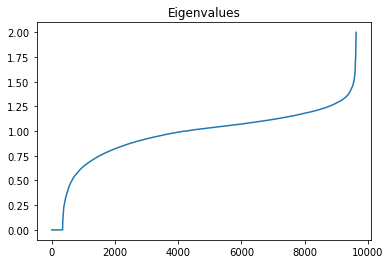

In [8]:
plt.plot(eigenvalues)
plt.title('Eigenvalues')

The plot of the Spectrum of the laplacien confirms the theory that all the eigenvalues are real and non-negative since L is real, symmetric and PSD. We can also see that the majority of eigenvalues are close to 1. Additionaly, we see that a certain number of eigenvalues are equal to 0, by counting them, we can count the number of connected components in the graph, and thus answer to the next question.

How many connected components are there in your graph? Answer using the eigenvalues only.

In [9]:
number_connected_components=np.where(eigenvalues== 0)
a = len(number_connected_components[0])
print(f'There are {a} connected components.')

There are 0 connected components.


Is there an upper bound on the eigenvalues, i.e., what is the largest possible eigenvalue? Answer for both the combinatorial and normalized Laplacians.

For the normalised Laplacian the largest possible eigenvalue is 2 . 

For the combinatorial Laplacian the upperbound on the eigenvalue is  $2 \cdot \Delta G$, with $\Delta G$ being the largest degree of the Laplacian matrix.

## 3 Laplacian eigenmaps

*Laplacian eigenmaps* is a method to embed a graph $\mathcal{G}$ in a $d$-dimensional Euclidean space.
That is, it associates a vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$.
The graph $\mathcal{G}$ is thus embedded as $Z \in \mathbb{R}^{N \times d}$.

### Question 7

What do we use Laplacian eigenmaps for? (Or more generally, graph embeddings.)

Laplacian eigenmaps is a technique used in order to dimentionally reduce the data. High dimentional data can be hard to visualize/interpret. Therefore if we assume that the data lies on an embedded manifold within the higher-dimensional space and if the manifold is of 2 or 3 dimensions for example, we can use the eigenmaps decomposition in order to visualize the data.

### Question 8

Embed your graph in $d=2$ dimensions with Laplacian eigenmaps.
Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.

**Recompute** the eigenvectors you need with a partial eigendecomposition method for sparse matrices.
When $k \ll N$ eigenvectors are needed, partial eigendecompositions are much more efficient than complete eigendecompositions.
A partial eigendecomposition scales as $\Omega(k |\mathcal{E}|$), while a complete eigendecomposition costs $\mathcal{O}(N^3)$ operations.

We've seen earlier that our graph has 343 connected components. However most of these connected components are nodes that are not connected to any other node. We have only 2 components that have more than 1 node. And from those two, one of them nearly englobes all the nodes (9276 out of a total of 9628). Therefore this giant component will be the only one we will be considering for the Laplacian Eigenmaps embedding:

In [10]:
# First, we will build the normalized laplacian of the giant component. 
# We will also build the combinatorial laplacian for comparasion.

import src.find_components as fcomp
# We need to have a connected graph.
# As our network is not connected, we use the adjacency matrix of the largest connected component instead

# The first element of the connectedIndices matrix is a vector of length equal to n_nodes
# The value of its elements is 1 if the element is in the largest connected componenent and 0 if it is not
connectedIndices = fcomp.find_components(adjacency)
biggestComponentSize = np.amax(np.sum(connectedIndices, axis=1))

# get the adjacency matrix of the largest connected component of our network
indx=np.array(range(n_nodes),dtype=int)
indx=connectedIndices[0].astype(int)*indx
indx_without_zeros=np.unique(indx)
Biggest_component=adjacency[indx_without_zeros,:][:,indx_without_zeros]

degree = np.diag(np.sum(Biggest_component, axis=0))
invroot_degree = np.diag(np.power(np.sum(Biggest_component, axis=0),-0.5))

laplacian_biggest_component = degree - Biggest_component #combinatorial laplacian

# Matrix mupltiplication as A*B seems to lose precision and rounds very small numbers to zero, giving a false normalized
# Laplacian. Therefore we use np.matmul and store the intermidiate result in vairable A:

A = np.matmul(invroot_degree,laplacian_biggest_component)
laplacian_normalized_biggest_component = np.matmul(A,invroot_degree) #normalized laplacian


In [11]:
# For an unknown reason, sparse.linalg.eigs takes more time (even for computing 3 vectors) than the np.linalg.eig, 
# therefore we will use the latter and take the first two vectors associated to the first 2 non-zero eigenvalues
# => the 2nd and the 3rd eigenvectors in vecs.Note th
# Note that eigh already sorts the eigenvalues (and the associaated eigenvectors) from smallest to largest.
vals, vecs = np.linalg.eigh(laplacian_biggest_component)

In [12]:
# Doing the same as above for the normalized laplacien
valsn, vecsn = np.linalg.eigh(laplacian_normalized_biggest_component)

**Plot the nodes embedded in 2D. Comment on what you see.**

Text(0.5, 1.0, 'Normalized by the degrees')

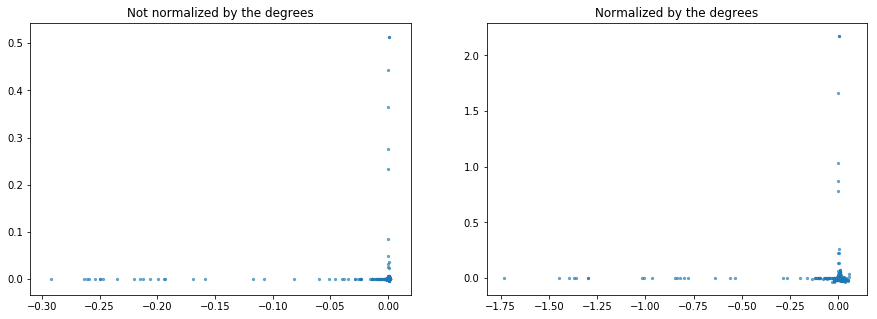

In [13]:
#normalized laplacian 2d eigenmaps
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(vecsn[:,1],vecsn[:,2],s=5,alpha=0.6)
plt.title('Not normalized by the degrees')

plt.subplot(122)
plt.scatter(np.divide(vecsn[:,1],np.diag(invroot_degree)),np.divide(vecsn[:,2],np.diag(invroot_degree)),s=5,alpha=0.6)
plt.title('Normalized by the degrees') 

[-0.004, 0.009, -0.006, 0.003]

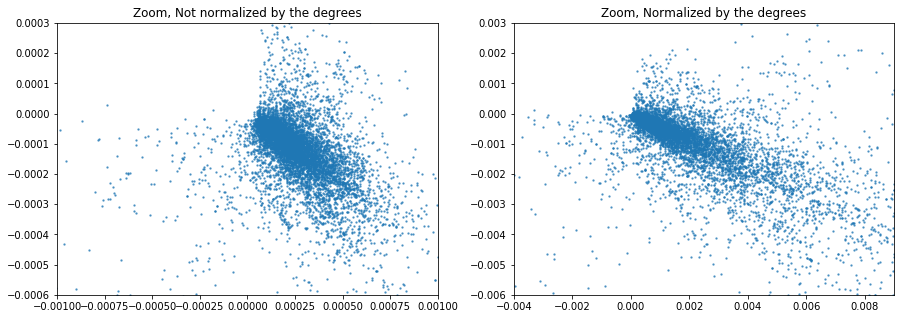

In [27]:
# We observe that we have a big cluster of points near 0. It's quite difficult to see what happens in that region 
# so let's zoom-in:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(vecsn[:,1],vecsn[:,2],s=2,alpha=0.6)

plt.title('Zoom, Not normalized by the degrees')
plt.axis([-0.001, 0.001, -0.0006, 0.0003])

plt.subplot(122)
plt.scatter(np.divide(vecsn[:,1],np.diag(invroot_degree)),np.divide(vecsn[:,2],np.diag(invroot_degree)),s=2,alpha=0.6)

plt.title('Zoom, Normalized by the degrees') 
plt.axis([-0.004, 0.009, -0.006, 0.003])


We observe that the scale of the normalized graph is reduced and all of our points are very close together near zero. As the laplacian eigenmaps preserve the locality, this means that our nodes are also very close together in the high dimention state state, suggesting a very connected graph.

Out of curiosity, we wanted to see what the combinatorial laplacian eigenmaps would look like:

[-0.004, 0.009, -0.006, 0.003]

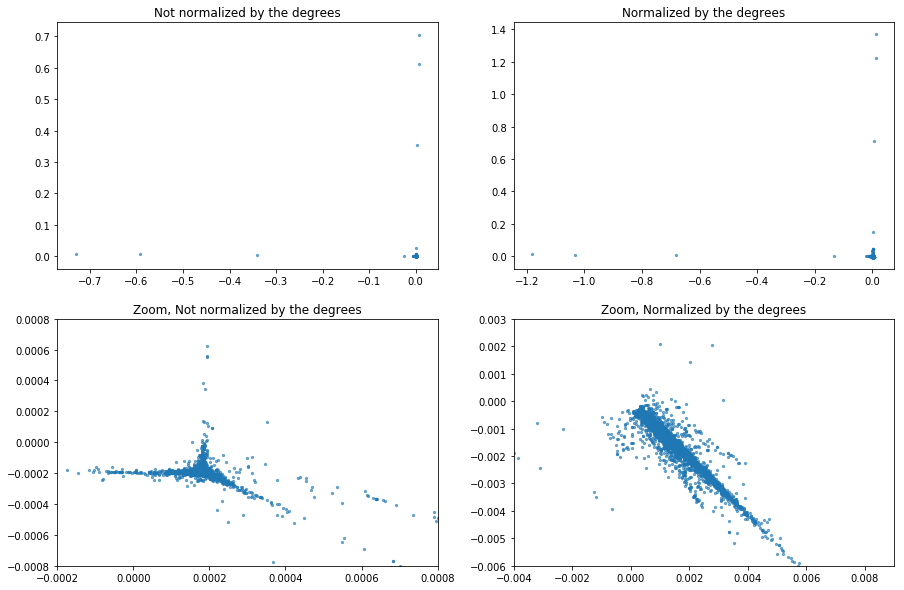

In [29]:
#combinatorial laplacian 2d eigenmaps
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(vecs[:,1],vecs[:,2],s=5,alpha=0.6)
plt.title('Not normalized by the degrees')

plt.subplot(222)
plt.scatter(np.divide(vecs[:,1],np.diag(invroot_degree)),np.divide(vecs[:,2],np.diag(invroot_degree)),s=5,alpha=0.6)
plt.title('Normalized by the degrees') 

plt.subplot(223)
plt.scatter(vecs[:,1],vecs[:,2],s=5,alpha=0.6)
plt.title('Zoom, Not normalized by the degrees')
plt.axis([-0.0002, 0.0008, -0.0008, 0.0008])

plt.subplot(224)
plt.scatter(np.divide(vecs[:,1],np.diag(invroot_degree)),np.divide(vecs[:,2],np.diag(invroot_degree)),s=5,alpha=0.6)
plt.title('Zoom, Normalized by the degrees') 
plt.axis([-0.004, 0.009, -0.006, 0.003])

### Question 9

What does the embedding $Z \in \mathbb{R}^{N \times d}$ preserve?

The Laplacian Eigenmaps embedding, preserves the locality of the data, i.e. the relative local distances of the data points. This means that data points that are close to one another in the high dementional (N) space, would also be close to eachother in the low dimentional (d) embedded space.

## 2 Spectral clustering

*Spectral clustering* is a method to partition a graph into distinct clusters.
The method associates a feature vector $z_i \in \mathbb{R}^d$ to every node $v_i \in \mathcal{V}$, then runs [$k$-means](https://en.wikipedia.org/wiki/K-means_clustering) in the embedding space $\mathbb{R}^d$ to assign each node $v_i \in \mathcal{V}$ to a cluster $c_j \in \mathcal{C}$, where $k = |\mathcal{C}|$ is the number of desired clusters.

### Question 10

Choose $k$ and $d$. How did you get to those numbers?

We chose to cluster the nodes (the actors) by using their ratings in each genre of film to which they participated. To do so, we first computed the mean of the ratings for each genre and for each actor. For example, the table could you look like the following :

| Actor | Action genre | Science fiction genre | Fantasy genre | ... |
|---|---|---|---|---|
| Arnold Schwarzenegger | 6.7 | 8.2 | 0 | ... |
| Ryan Reynold | 4 | 0 | 7.5 | ... |


It would enable us to see if actors playing in the same kind of film are more interconnected.

This dataset contains 18 different movie genres, thus $k = 18$. As we have the average rating of each genre for each node, our dataset will be clustered in a space of the same number of dimensions, so $d = k = 18$

### Question 11

1. Embed your graph in $\mathbb{R}^d$ as $Z \in \mathbb{R}^{N \times d}$.
   Try with and without re-normalizing the eigenvectors by the degrees, then keep the one your prefer.
1. If you want $k=2$ clusters, partition with the Fiedler vector. For $k > 2$ clusters, run $k$-means on $Z$. Don't implement $k$-means, use the `KMeans` class imported from scikit-learn.

### 2 types of clustering
We clustered using the 18 first eigenvectors, but also using the 18 feature vectors (the average rating for each movie type). We did this to observe if a method was better than the other.

In [30]:
import pandas as pd

k_clusters = 18

# K-Means using the features associated to each actor

people = pd.read_csv('data/features_v3.csv')

people.fillna(0)

genre_ratings = people.iloc[indx_without_zeros,5:23]

trueLabels = people.iloc[indx_without_zeros,4]

genre_ratings.fillna(0, inplace=True)

kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(genre_ratings.values)

predictedLabels = kmeans.labels_

In [31]:
# K-Means based on the eigenvactors of the laplacian

# We take the first 18 eigenvectors
selected_eigenvectors=vecs[0:k_clusters].T
selected_eigenvectors.shape #this is R 9276x18

kmeans2 = KMeans(n_clusters=k_clusters, random_state=0).fit(selected_eigenvectors)
predictedLabels2 = kmeans2.labels_

### Question 12

Use the computed cluster assignment to reorder the adjacency matrix $A$.
What do you expect? What do you observe?

In [32]:
def reorderMatrix(adjacency, predictedLabels):

    s = adjacency.shape[0]

    tmp_adjacency = np.zeros((s,s))
    ordered_adjacency = np.zeros((s,s))
    
    k_clusters = np.unique(predictedLabels).shape[0]

    a = 0
    for k in range(0,k_clusters):
        indexes = np.argwhere(predictedLabels==k)
        for i in np.nditer(indexes):
            tmp_adjacency[a,:] = adjacency[i,:]
            a = a+1
        
    a = 0
    for k in range(0,k_clusters):
        indexes = np.argwhere(predictedLabels==k)
        for i in np.nditer(indexes):
            ordered_adjacency[:,a] = tmp_adjacency[:,i]
            a = a+1
    return ordered_adjacency;

Text(0.5, 1.05, 'Original Adjacency matrix')

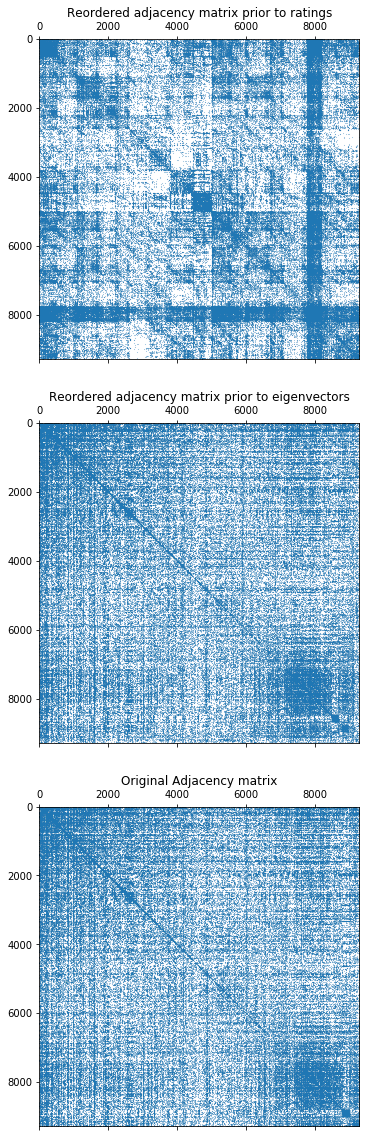

In [33]:
plt.figure(figsize=(15, 20))
plt.subplot(311)
plt.spy(reorderMatrix(Biggest_component, predictedLabels), markersize=0.1)
plt.title('Reordered adjacency matrix prior to ratings')
plt.subplot(312)
plt.spy(reorderMatrix(Biggest_component, predictedLabels2), markersize=0.1)
plt.title('Reordered adjacency matrix prior to eigenvectors')
plt.subplot(313)
plt.spy(Biggest_component, markersize=0.1)
plt.title('Original Adjacency matrix')


We were expecting to see a pattern in the adjacency matrix. 

This is indeed what we can observe on the reordered matrix prior to ratings. We can see some squares around the diagonal of the adjacency matrix, which means that actors in the same cluster are very connected, and have less conexion with other clusters. 
We can also see that one cluster has connection with almost everyother clusters (this can be seen with the vertical and horizontal bars around node 8000). This means that this cluster is composed of nodes that are very connected (hubs).

For the rearranged matrix in prior to eigenvectors, we see almost no changes. This is because k-means clustered almost every node into the first cluster.

### Question 13

If you have ground truth clusters for your dataset, compare the cluster assignment from spectral clustering to the ground truth.
A simple quantitative measure is to compute the percentage of nodes that have been correctly categorized.
If you don't have a ground truth, qualitatively assess the quality of the clustering.

Ground truth clusters are the "real clusters".
For example, the genre of musical tracks in FMA, the category of Wikipedia articles, the spammer status of individuals, etc.
Look for the `labels` in the [dataset descriptions](https://github.com/mdeff/ntds_2018/tree/master/projects/README.md).


#### Ground Truth labels in our dataset
As written in the dataset description, the labels should be the movie genre. The problem is that we do not have ground truth clusters for actors. The dataset contains a genre label for each movie, however as the actors played in different movies, they technically have multiple labels.

So we decided that the genre label of each actor would be determined by the movie genre in which the actor acted the most.
#### *Example*
Arnold Schwarzenegger played in 76 action movies, 35 science fiction movies and 26 other genre of movies. Therefore, his label will be **action genre**.

#### Assigning the correct genre to the new clusters
Once we cluster with k-means, we obtain k clusters, but do not know what genre they represent. To do that, we count the number of actors in each cluster, and see what true labels are the most present. We then assign this label to the cluster.

#### *Example*
The first cluster contains 20 actors considered as action actors, 50 considered as Horror actors and 30 actors of other genres. Therefore the label assigned to this cluster will be **Horror**


In [34]:
def computeFractionCorrectlyClassified(trueLabels, predictedLabels):
    labels = pd.DataFrame({'true_labels' : trueLabels, 'idx_true_labels': 0, 'predicted_labels' : predictedLabels})

    maxLabel = int(np.max(labels['true_labels']))

    for i in range(0,maxLabel):
        A = labels.query(f'true_labels == {i}')
        B = A['predicted_labels'].value_counts()
    
        if B.empty == False:
            predictedLabelOfGenre = B.idxmax()
            for node in labels.iterrows():
                if node[1]['true_labels'] == i:
                    labels.loc[node[0],'idx_true_labels'] = predictedLabelOfGenre
                
    correctlyClassified = labels.query('idx_true_labels == predicted_labels').shape

    fractionCorrectlyClassified = 100*correctlyClassified[0]/labels.shape[0]
    
    return fractionCorrectlyClassified;

In [35]:
fcorrFeat = computeFractionCorrectlyClassified(trueLabels, predictedLabels)
fcorrEig =computeFractionCorrectlyClassified(trueLabels, predictedLabels2)

print(f'The number of well classified nodes by using the features (ratings) is {fcorrFeat}% and the number of well classified nodes by using the eigenvectors is {fcorrEig}%.')

The number of well classified nodes by using the features (ratings) is 15.362225097024579% and the number of well classified nodes by using the eigenvectors is 96.4963346269944%.


#### Conclusion

The clustering seems to assign a genre to each actor that does not correspond to the kind of film in which he played the most.

If we cluster using the 18 first eigenvectors, we obtain 1 very large cluster that contains almost every nodes, and 17 smaller clusters. This might be because our initial graph is very connected, and that actors of different movie genres are still connected between each other. Thus k-means is not able to cluster actors with respect to their labeled genre.

On the other hand, if we cluster using the features associated to each actors (their ratings by genre), we get 18 cluster of very similar size. Once again, this doesn't represent correctly the truth labels.


### Question 14

Plot the cluster assignment (one color per cluster) on the 2D embedding you computed above with Laplacian eigenmaps.

[-0.0003, 0.001, -0.0006, 0.0003]

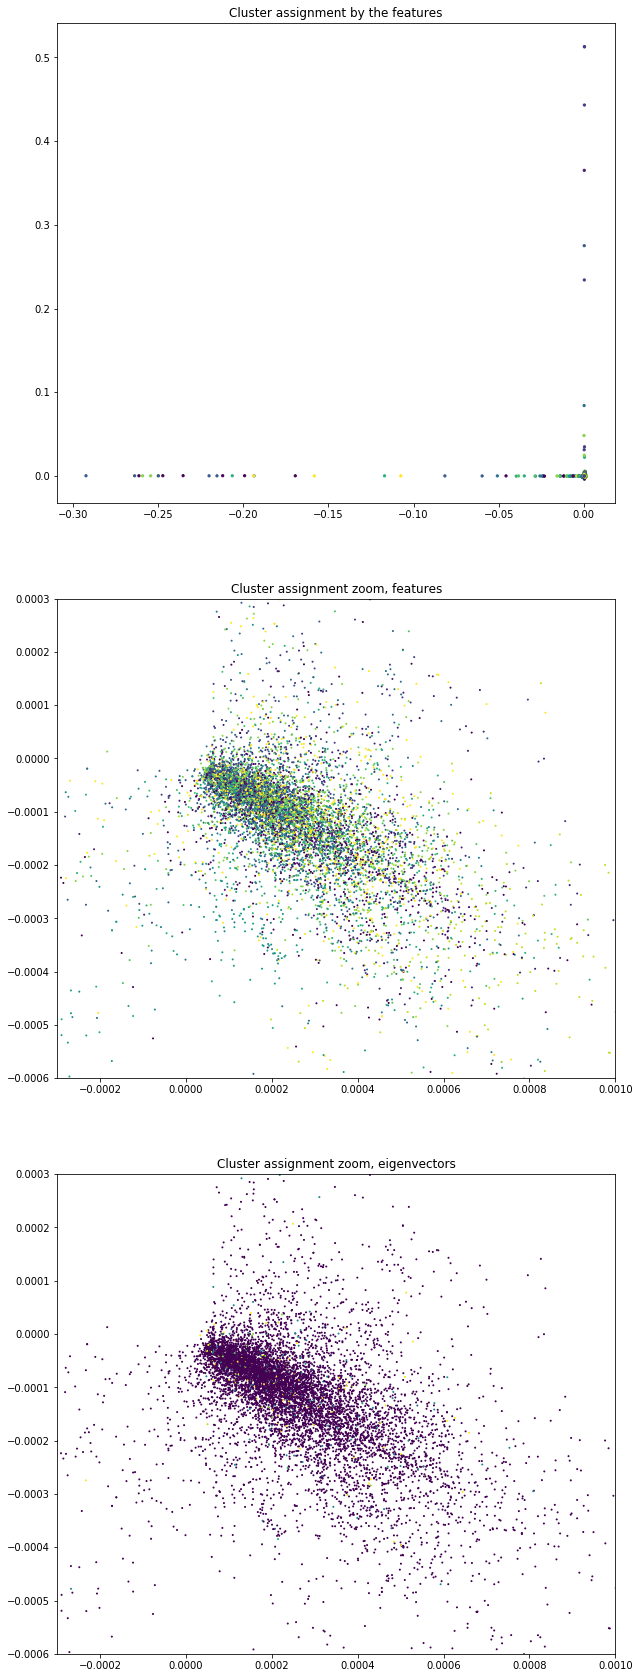

In [36]:
import matplotlib as mpl
from matplotlib import cm

viridis = cm.get_cmap('viridis', 12)

plt.figure(figsize=(10, 30))

plt.subplot(311)
plt.scatter(vecsn[:,1],vecsn[:,2],s=5, c=predictedLabels, cmap=viridis)
plt.title('Cluster assignment by the features')

plt.subplot(312)
plt.scatter(vecsn[:,1],vecsn[:,2],s=1, c=predictedLabels, cmap=viridis)
plt.title('Cluster assignment zoom, features')
plt.axis([-0.0003, 0.001, -0.0006, 0.0003])

plt.subplot(313)
plt.scatter(vecsn[:,1],vecsn[:,2],s=1, c=predictedLabels2, cmap=viridis)
plt.title('Cluster assignment zoom, eigenvectors')
plt.axis([-0.0003, 0.001, -0.0006, 0.0003])

### Question 15

Why did we use the eigenvectors of the graph Laplacian as features? Could we use other features for clustering?

Because the eigenvectors are orthonormal and embed the information about the graph's structure (how connected the graph is for example). Using them as features allow us to cluster in a lower-dimensional space that keeps the locality of the data in the original space.

We tried using other features (the ratings of the actor for each genre), but it didn't give satisfying results. We obtained clusters that had a more homogeneous number of nodes, compared to the clustering with the graph Laplacian which resulted in a very large cluster. However these new clusters are still far from the ground truth labels.
Of course, we could try using another set of features, but we think that the main issue is that the dataset doesn't have actual ground truth labels for the actors. The way we assigned ground truth labels to actors might not be the most optimal. Especially since most actors played in large variety of movie genres, thus assigning them 1 genre only might be biased.